# plot srovnani asym buz, sym buz a oscilace axialnich elektrod

In [1]:
# Setup some Jupyter env features
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# plot dat
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams

rcParams["font.size"] = 16
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "true";
rc('text', usetex=True)

my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

In [16]:
import numpy as np

## nacteni dat ze souboru
# pole generovano axialni elektrodou v + 2.25mm
z_data = np.genfromtxt("axial_field_unitary_rad_ax_correct_ax_pos_delim.txt")[:,1]
# E_field_ax_data = np.genfromtxt("axial_field_unitary_rad_ax_delim.txt")[:,2]
E_field_ax_data = np.genfromtxt("axial_field_unitary_rad_ax_correct_ax_pos_delim.txt")[:,2]
# E_field_rad_data_par = np.genfromtxt("axial_field_unitary_rad_ax_delim.txt")[:,3]
E_field_rad_data_par = np.genfromtxt("axial_field_unitary_rad_ax_correct_ax_pos_delim.txt")[:,3]
E_field_rad_data_jedna = E_field_rad_data_par/2 # pole generovane jednou radialni elektrodou na ose z je polovicni oproti poli
# E_field_rad_data_jedna = E_field_rad_data_par/4         # pokud vemu polovinu pole z modelu, tak sedi relativne dobre na mereni                                     
    
leng_data = len(z_data)

from scipy import interpolate

# definice interpolacnich fci
E_field_ax_6 = interpolate.interp1d(z_data*1e3, E_field_ax_data, kind='quadratic')
E_field_ax_5 = interpolate.interp1d(z_data*1e3, -1*E_field_ax_data[::-1], kind='quadratic')
E_field_rad_jedna = interpolate.interp1d(z_data*1e3, E_field_rad_data_jedna, kind='quadratic')


# dalsi parametry
m = 40 * 1.66053904e-27 # calcium mass
k_vec = 2*np.pi * 1/(397e-9) # wave vector
e = 1.60217662e-19 # elem charge
Omega = 2*np.pi * 30e6
# funkce vracejici amplitudu rf pole v zavislosti na z a na ostatnich parametrech
def E_rf_amp_func(Vrf, phi, delta_z_ax, z, f_interp):
    # Vrf = [Vrf_1, Vrf_2, Vrf_3, Vrf_4, Vrf_5, Vrf_6] 
    # phi = [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6]  
    # delta_z_ax - [vychyleni ax_5, vychyleni ax_6]
    # z = [] body, ve kterych chci fci vyhodnotit
    # f_interp = (E_field_rad, E_field_ax5, E_field_ax6) 
    
    # out: amplituda E_pole
    
    rad_amp = sum( Vrf[:4] * np.exp(phi[:4] * 1j ) )
    ax_5_amp = Vrf[4] * np.exp(phi[4] * 1j )
    ax_6_amp = Vrf[5] * np.exp(phi[5] * 1j )
    
    E_rf_complex = rad_amp * f_interp[0](z) + ax_5_amp * f_interp[1](z - delta_z_ax[0]) + ax_6_amp * f_interp[2](z - delta_z_ax[1])

    # amplituda a faze
    return np.abs(E_rf_complex)

# funkce vracejici fazi rf pole v zavislosti na z a na ostatnich parametrech
def E_rf_phase_func(Vrf, phi, delta_z_ax, z, f_interp):
    # Vrf = [Vrf_1, Vrf_2, Vrf_3, Vrf_4, Vrf_5, Vrf_6] 
    # phi = [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6]  
    # delta_z_ax - [vychyleni ax_5, vychyleni ax_6]
    # z = [] body, ve kterych chci fci vyhodnotit
    # f_interp = (E_field_rad, E_field_ax5, E_field_ax6) 
    
    # out: amplituda E_pole
    
    rad_amp = sum( Vrf[:4] * np.exp(phi[:4] * 1j ) )
    ax_5_amp = Vrf[4] * np.exp(phi[4] * 1j )
    ax_6_amp = Vrf[5] * np.exp(phi[5] * 1j )
    
    E_rf_complex = rad_amp * f_interp[0](z) + ax_5_amp * f_interp[1](z - delta_z_ax[0]) + ax_6_amp * f_interp[2](z - delta_z_ax[1])

    # amplituda a faze
    return np.angle(E_rf_complex)

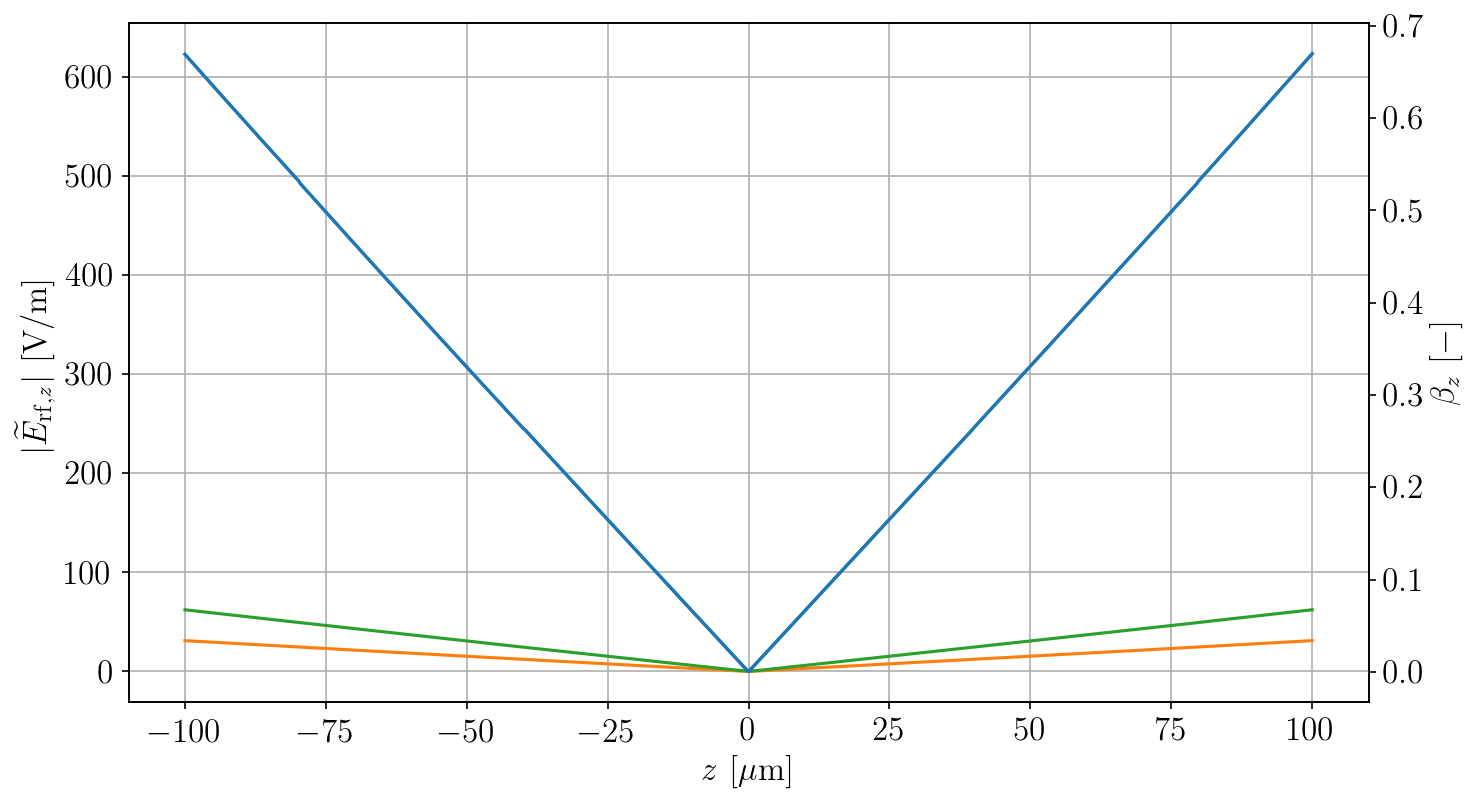

In [4]:
# napeti a faze na elektrodach pasti
Vrf_1 = 500
Vrf_2 = 0
Vrf_3 = 500
Vrf_4 = 0
Vrf_5 = 0
Vrf_6 = 0
Vrf = np.array( [Vrf_1, Vrf_2, Vrf_3, Vrf_4, Vrf_5, Vrf_6] )

phi_1 = 0
phi_2 = 0
phi_3 = 0
phi_4 = 0
phi_5 = 0
phi_6 = 0

phi = np.array( [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6] )

delta_z_ax = [0, 0]

z_range = np.linspace(-100, 100, 1000)
E_rf_amp = E_rf_amp_func(Vrf, phi, delta_z_ax,z_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
beta_amp = e*k_vec / (m * Omega**2) * E_rf_amp
# z_min_EMM = z_range[ np.argmin(E_rf_amp) ]
# print(z_min_EMM)

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

ax1 = plt.gca()
# plt.plot(z_data*1e3, E_rf_amp)
ax1.plot(z_range, E_rf_amp)

ax2 = ax1.twinx()
ax2.plot(z_range, beta_amp)

#### symetricke buzeni
# napeti a faze na elektrodach pasti
Vrf_1 = 250
Vrf_2 = 250
Vrf_3 = 250
Vrf_4 = 250
Vrf_5 = 0
Vrf_6 = 0
Vrf = np.array( [Vrf_1, Vrf_2, Vrf_3, Vrf_4, Vrf_5, Vrf_6] )

phi_1 = 0
phi_2 = np.pi + 0.1
phi_3 = 0
phi_4 = np.pi + 0.1
phi_5 = 0
phi_6 = 0

phi = np.array( [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6] )

E_rf_amp = E_rf_amp_func(Vrf, phi, delta_z_ax,z_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
ax1.plot(z_range, E_rf_amp)
#####################

#### osc. axi el 
# napeti a faze na elektrodach pasti
Vrf_1 = 500
Vrf_2 = 0
Vrf_3 = 500
Vrf_4 = 0
Vrf_5 = 250
Vrf_6 = 250
Vrf = np.array( [Vrf_1, Vrf_2, Vrf_3, Vrf_4, Vrf_5, Vrf_6] )

phi_1 = 0
phi_2 = 0
phi_3 = 0
phi_4 = 0
phi_5 = 0.1
phi_6 = 0.1

phi = np.array( [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6] )

E_rf_amp = E_rf_amp_func(Vrf, phi, delta_z_ax,z_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
ax1.plot(z_range, E_rf_amp)
#####################

ax1.set_xlabel(r'$z\, \, \rm [\mu m]$')
ax1.set_ylabel(r'$ | \widetilde{ E}_{\rm rf, \it z} | \, \, \rm [V/m] $')
ax2.set_ylabel(r'$\beta_z \, \, \rm [-]$')

ax1.grid()

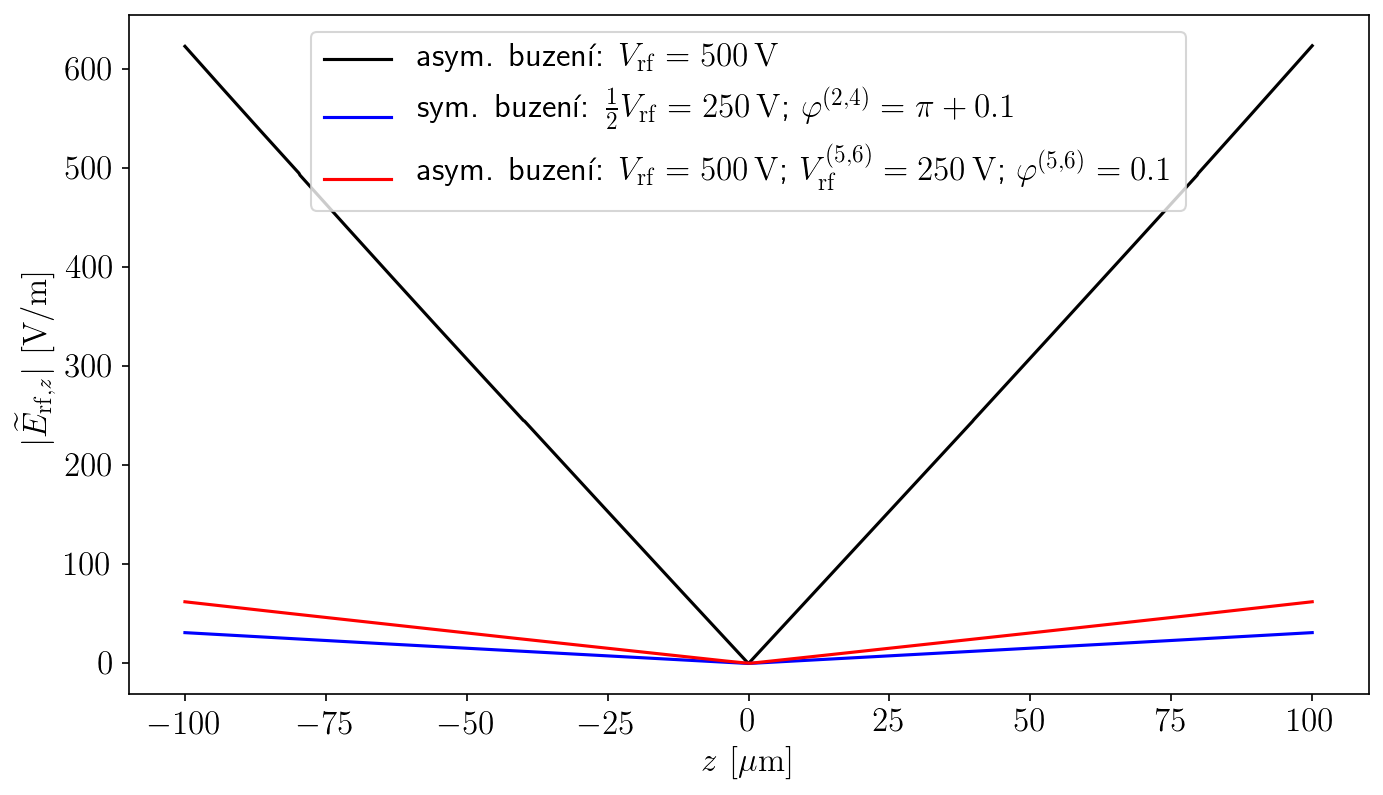

In [5]:
# napeti a faze na elektrodach pasti
Vrf_1 = 500
Vrf_2 = 0
Vrf_3 = 500
Vrf_4 = 0
Vrf_5 = 0
Vrf_6 = 0
Vrf = np.array( [Vrf_1, Vrf_2, Vrf_3, Vrf_4, Vrf_5, Vrf_6] )

phi_1 = 0
phi_2 = 0
phi_3 = 0
phi_4 = 0
phi_5 = 0
phi_6 = 0

phi = np.array( [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6] )

delta_z_ax = [0, 0]

z_range = np.linspace(-100, 100, 1000)
E_rf_amp = E_rf_amp_func(Vrf, phi, delta_z_ax,z_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
# beta_amp = e*k_vec / (m * Omega**2) * E_rf_amp
# z_min_EMM = z_range[ np.argmin(E_rf_amp) ]
# print(z_min_EMM)

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

ax1 = plt.gca()
# plt.plot(z_data*1e3, E_rf_amp)
ax1.plot(z_range, E_rf_amp, label=r'asym. buzení: $ V_{\rm rf} = 500 \, \rm V $ ', color='black')

# ax2 = ax1.twinx()
# ax2.plot(z_range, beta_amp)

#### symetricke buzeni
# napeti a faze na elektrodach pasti
Vrf_1 = 250
Vrf_2 = 250
Vrf_3 = 250
Vrf_4 = 250
Vrf_5 = 0
Vrf_6 = 0
Vrf = np.array( [Vrf_1, Vrf_2, Vrf_3, Vrf_4, Vrf_5, Vrf_6] )

phi_1 = 0
phi_2 = np.pi + 0.1
phi_3 = 0
phi_4 = np.pi + 0.1
phi_5 = 0
phi_6 = 0

phi = np.array( [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6] )

E_rf_amp = E_rf_amp_func(Vrf, phi, delta_z_ax,z_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
ax1.plot(z_range, E_rf_amp, label=r'sym. buzení: $ \frac{1}{2} V_{\rm rf} = 250 \, \rm V $; $\varphi^{(2,4)} = \pi + 0.1 $ ', color='blue')
#####################

#### osc. axi el 
# napeti a faze na elektrodach pasti
Vrf_1 = 500
Vrf_2 = 0
Vrf_3 = 500
Vrf_4 = 0
Vrf_5 = 250
Vrf_6 = 250
Vrf = np.array( [Vrf_1, Vrf_2, Vrf_3, Vrf_4, Vrf_5, Vrf_6] )

phi_1 = 0
phi_2 = 0
phi_3 = 0
phi_4 = 0
phi_5 = 0.1
phi_6 = 0.1

phi = np.array( [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6] )

E_rf_amp = E_rf_amp_func(Vrf, phi, delta_z_ax,z_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
ax1.plot(z_range, E_rf_amp, label=r'asym. buzení: $ V_{\rm rf} = 500 \, \rm V $; $ V_{\rm rf}^{(5,6)} = 250 \, \rm V $; $\varphi^{(5,6)} = 0.1 $ ', color='red')
#####################

ax1.set_xlabel(r'$z\, \, \rm [\mu m]$')
ax1.set_ylabel(r'$ | \widetilde{ E}_{\rm rf, \it z} | \, \, \rm [V/m] $')
# ax2.set_ylabel(r'$\beta_z \, \, \rm [-]$')

# ax1.grid()
ax1.legend()

# plt.savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/julia_plots/asym_sym_axi_osc.svg", bbox_inches="tight")

# Zkusim dalsi ilustrativni plot chovani modelu

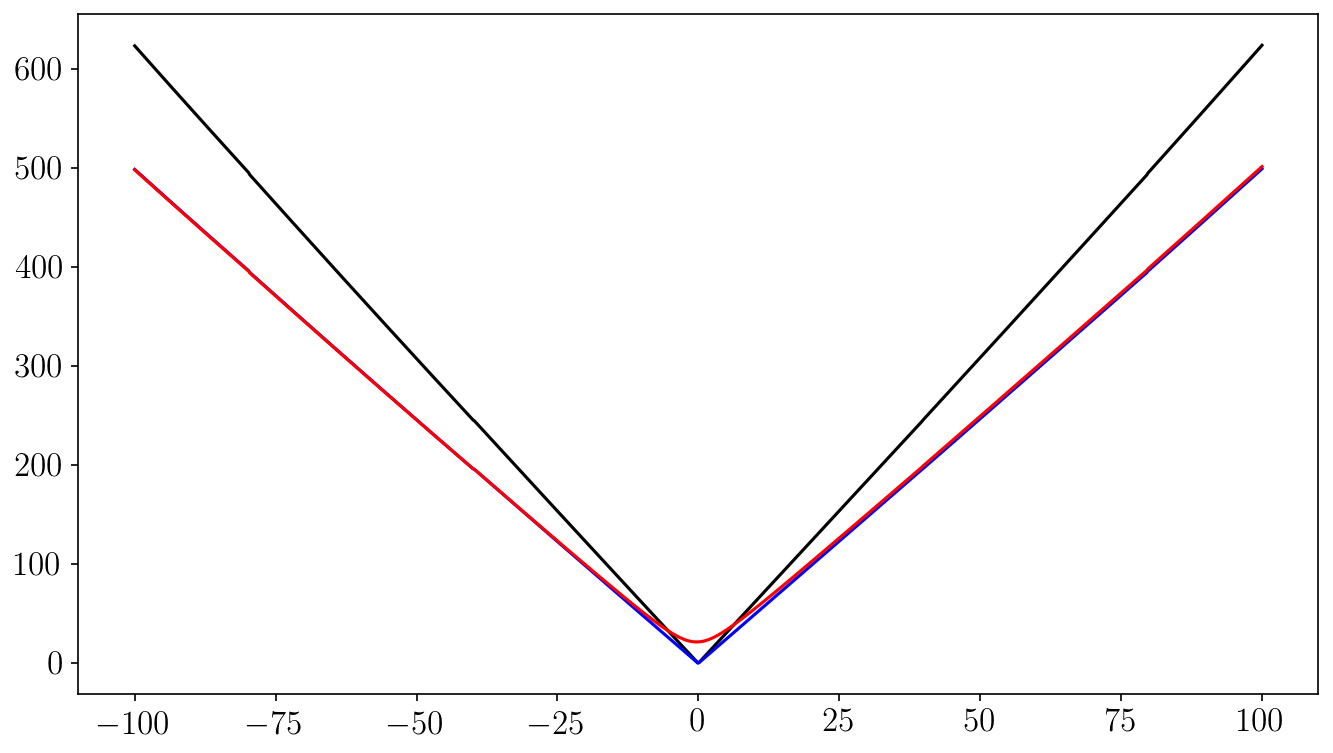

In [14]:
# napeti a faze na elektrodach pasti
Vrf_1 = 500
Vrf_2 = 0
Vrf_3 = 500
Vrf_4 = 0
Vrf_5 = 0
Vrf_6 = 0
Vrf = np.array( [Vrf_1, Vrf_2, Vrf_3, Vrf_4, Vrf_5, Vrf_6] )

phi_1 = 0
phi_2 = 0
phi_3 = 0
phi_4 = 0
phi_5 = 0
phi_6 = 0

phi = np.array( [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6] )

delta_z_ax = [0, 0]

z_range = np.linspace(-100, 100, 1000)
E_rf_amp = E_rf_amp_func(Vrf, phi, delta_z_ax,z_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
# beta_amp = e*k_vec / (m * Omega**2) * E_rf_amp
# z_min_EMM = z_range[ np.argmin(E_rf_amp) ]
# print(z_min_EMM)

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

ax1 = plt.gca()
# plt.plot(z_data*1e3, E_rf_amp)
ax1.plot(z_range, E_rf_amp, label=r'asym. buzení: $ V_{\rm rf} = 500 \, \rm V $ ', color='black')

#### ###############
# napeti a faze na elektrodach pasti
Vrf_1 = 500
Vrf_2 = 0
Vrf_3 = 500
Vrf_4 = 0
Vrf_5 = 50
Vrf_6 = 50
Vrf = np.array( [Vrf_1, Vrf_2, Vrf_3, Vrf_4, Vrf_5, Vrf_6] )

phi_1 = 0
phi_2 = 0
phi_3 = 0
phi_4 = 0
phi_5 = 0
phi_6 = 0

phi = np.array( [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6] )

E_rf_amp = E_rf_amp_func(Vrf, phi, delta_z_ax,z_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
ax1.plot(z_range, E_rf_amp, label=r'sym. buzení: $ \frac{1}{2} V_{\rm rf} = 250 \, \rm V $; $\varphi^{(2,4)} = \pi + 0.1 $ ', color='blue')
#####################


#### ###############
# napeti a faze na elektrodach pasti
Vrf_1 = 500
Vrf_2 = 0
Vrf_3 = 500
Vrf_4 = 0
Vrf_5 = 50
Vrf_6 = 50
Vrf = np.array( [Vrf_1, Vrf_2, Vrf_3, Vrf_4, Vrf_5, Vrf_6] )

phi_1 = 0
phi_2 = 0
phi_3 = 0
phi_4 = 0
phi_5 = 0
phi_6 = 0.1

phi = np.array( [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6] )

E_rf_amp = E_rf_amp_func(Vrf, phi, delta_z_ax,z_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
ax1.plot(z_range, E_rf_amp, label=r'sym. buzení: $ \frac{1}{2} V_{\rm rf} = 250 \, \rm V $; $\varphi^{(2,4)} = \pi + 0.1 $ ', color='red')
#####################

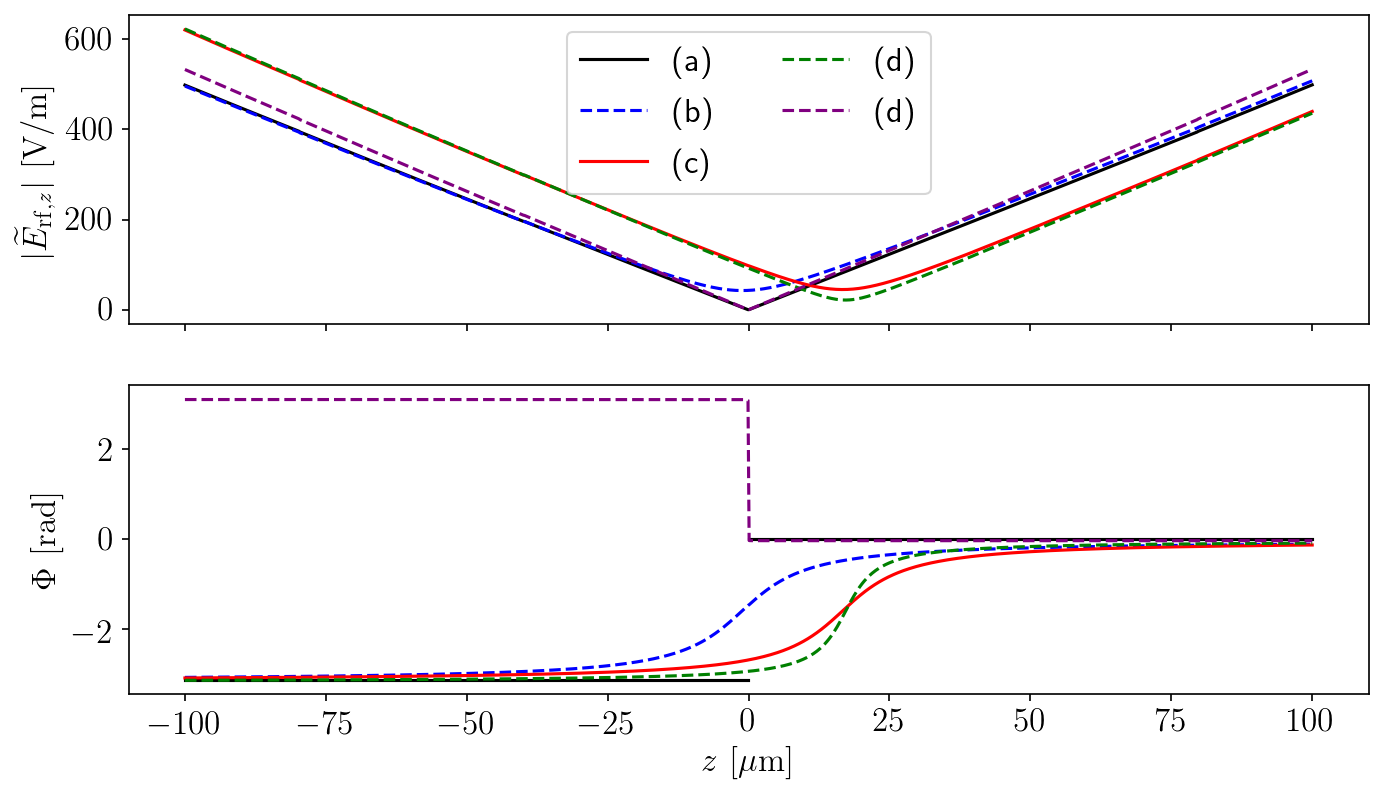

In [68]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

# # napeti a faze na elektrodach pasti
# Vrf_1 = 500
# Vrf_2 = 0
# Vrf_3 = 500
# Vrf_4 = 0
# Vrf_5 = 0
# Vrf_6 = 0
# Vrf = np.array( [Vrf_1, Vrf_2, Vrf_3, Vrf_4, Vrf_5, Vrf_6] )

# phi_1 = 0
# phi_2 = 0
# phi_3 = 0
# phi_4 = 0
# phi_5 = 0
# phi_6 = 0

# phi = np.array( [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6] )

# delta_z_ax = [0, 0]

# z_range = np.linspace(-100, 100, 1000)
# E_rf_amp = E_rf_amp_func(Vrf, phi, delta_z_ax,z_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
# # E_rf_phase = E_rf_phase_func(Vrf, phi, delta_z_ax,z_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
# # beta_amp = e*k_vec / (m * Omega**2) * E_rf_amp
# # z_min_EMM = z_range[ np.argmin(E_rf_amp) ]
# # print(z_min_EMM)

# # plt.plot(z_data*1e3, E_rf_amp)
# ax1.plot(z_range, E_rf_amp, label=r'asym. buzení: $ V_{\rm rf} = 500 \, \rm V $ ', color='black')
# # ax2.plot(z_range, E_rf_phase)
#### ###############
# napeti a faze na elektrodach pasti
Vrf_1 = 500
Vrf_2 = 0
Vrf_3 = 500
Vrf_4 = 0
Vrf_5 = 50
Vrf_6 = 50
Vrf = np.array( [Vrf_1, Vrf_2, Vrf_3, Vrf_4, Vrf_5, Vrf_6] )

phi_1 = 0
phi_2 = 0
phi_3 = 0
phi_4 = 0
phi_5 = 0
phi_6 = 0

phi = np.array( [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6] )
delta_z_ax = [0, 0]
z_range = np.linspace(-100, 100, 1000)
E_rf_amp = E_rf_amp_func(Vrf, phi, delta_z_ax,z_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
E_rf_phase = E_rf_phase_func(Vrf, phi, delta_z_ax,z_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
ax1.plot(z_range, E_rf_amp, label=r'(a)', color='black')
ax2.plot(np.split(z_range,2)[0], np.split(-E_rf_phase,2)[0], color='black' )
ax2.plot(np.split(z_range,2)[1], np.split(-E_rf_phase,2)[1], color='black' )
#####################


#### ###############
# napeti a faze na elektrodach pasti
Vrf_1 = 500
Vrf_2 = 0
Vrf_3 = 500
Vrf_4 = 0
Vrf_5 = 50
Vrf_6 = 50
Vrf = np.array( [Vrf_1, Vrf_2, Vrf_3, Vrf_4, Vrf_5, Vrf_6] )

phi_1 = 0
phi_2 = 0
phi_3 = 0
phi_4 = 0
phi_5 = 0
phi_6 = 0.2

phi = np.array( [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6] )

E_rf_amp = E_rf_amp_func(Vrf, phi, delta_z_ax,z_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
E_rf_phase = E_rf_phase_func(Vrf, phi, delta_z_ax,z_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
ax1.plot(z_range, E_rf_amp, label=r'(b) ', color='blue', linestyle='--')
ax2.plot(z_range, E_rf_phase, color='blue', linestyle='--')
#####################

#### ###############
# napeti a faze na elektrodach pasti
Vrf_1 = 500
Vrf_2 = 0
Vrf_3 = 500
Vrf_4 = 0
Vrf_5 = 50
Vrf_6 = 50
Vrf = np.array( [Vrf_1, Vrf_2, Vrf_3, Vrf_4, Vrf_5, Vrf_6] )

phi_1 = 0
phi_2 = 0
phi_3 = 0
phi_4 = 0
phi_5 = 0
phi_6 = 0.2

phi = np.array( [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6] )
delta_z_ax = [-200, 0]

E_rf_amp = E_rf_amp_func(Vrf, phi, delta_z_ax,z_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
E_rf_phase = E_rf_phase_func(Vrf, phi, delta_z_ax,z_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
ax1.plot(z_range, E_rf_amp, label=r'(c)', color='red')
ax2.plot(z_range, E_rf_phase, color='red')
#####################

#### ###############
# napeti a faze na elektrodach pasti
Vrf_1 = 500
Vrf_2 = 0
Vrf_3 = 500
Vrf_4 = 0
Vrf_5 = 50
Vrf_6 = 50
Vrf = np.array( [Vrf_1, Vrf_2, Vrf_3, Vrf_4, Vrf_5, Vrf_6] )

phi_1 = 0
phi_2 = 0
phi_3 = 0
phi_4 = 0
phi_5 = 0.2
phi_6 = 0.2

phi = np.array( [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6] )
delta_z_ax = [-200, 0]

E_rf_amp = E_rf_amp_func(Vrf, phi, delta_z_ax,z_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
E_rf_phase = E_rf_phase_func(Vrf, phi, delta_z_ax,z_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
ax1.plot(z_range, E_rf_amp, label=r'(d)', color='green', linestyle='--')
ax2.plot(z_range, np.unwrap(E_rf_phase) -2*np.pi, color='green', linestyle='--')
#####################
# # napeti a faze na elektrodach pasti
# Vrf_1 = 500
# Vrf_2 = 0
# Vrf_3 = 500
# Vrf_4 = 0
# Vrf_5 = 50
# Vrf_6 = 50
# Vrf = np.array( [Vrf_1, Vrf_2, Vrf_3, Vrf_4, Vrf_5, Vrf_6] )

# phi_1 = 0
# phi_2 = 0
# phi_3 = 0
# phi_4 = 0
# phi_5 = 0.2
# phi_6 = 0.2

# phi = np.array( [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6] )
# delta_z_ax = [-100, +100]

# E_rf_amp = E_rf_amp_func(Vrf, phi, delta_z_ax,z_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
# E_rf_phase = E_rf_phase_func(Vrf, phi, delta_z_ax,z_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
# ax1.plot(z_range, E_rf_amp, label=r'(d)', color='purple', linestyle='--')
# ax2.plot(z_range, np.unwrap(E_rf_phase), color='purple', linestyle='--')
#####################

# ax1.set_xlabel(r'$z\, \, \rm [\mu m]$')
ax1.set_ylabel(r'$ | \widetilde{ E}_{\rm rf, \it z} | \, \, \rm [V/m] $')
ax2.set_xlabel(r'$z\, \, \rm [\mu m]$')
ax2.set_ylabel(r'$ \Phi \, \, \rm [rad] $')
ax1.legend(ncol=2)

# plt.savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/julia_plots/axial_MM_dalsi_vlastnosti.svg", bbox_inches="tight")